In [44]:
import numpy as np
import pandas as pd

routes = pd.read_csv("routes.csv", encoding = 'latin-1')
species = pd.read_csv("SpeciesList.csv")
wa_observes = pd.read_csv("Washing.csv")
weather = pd.read_csv("Weather.csv")
wa_weather = weather[weather["StateNum"] == 89]
mt_rainier_weather = wa_weather[wa_weather["Route"] == 61].drop(["CountryNum", "StateNum", "Route"], axis = 1)
bay_view_weather = wa_weather[wa_weather["Route"] == 66]
#WA State num -> 89

### Rainier Weather Cleanup

In [47]:
noaa_longmire = pd.read_csv("Longmire_Ranier_Weather_Monthly.csv")
noaa_paradise = pd.read_csv("Ranger_Station_Ranier_Weather_Monthly.csv")

#EMNT: extreme monthly min daily temp
#EMXT: extreme montly max daily temp
#PRCP: total monthly precip

noaa_longmire = noaa_longmire[["DATE", "EMNT", "EMXT",	"PRCP",	"TAVG",	"TMAX",	"TMIN"]]
noaa_paradise = noaa_paradise.drop(["STATION", "NAME", "CDSD", "HDSD"], axis = 1)

noaa_weather_rainier = pd.merge(noaa_longmire, noaa_paradise, on = ["DATE", "DATE"])

# The two locations are 10 miles apart so I feel good averaging the two to make
# more substantial data accuracy for the months

def avg_cols(df1, df2, cols_to_avg):
    result = df1.copy()
    for col in cols_to_avg:
        result[col] = np.nanmean([df1[col], df2[col]], axis = 0)

    return result

noaa_weather_rainier = avg_cols(noaa_longmire[0:519], noaa_paradise, ["EMNT", "EMXT", "PRCP", "TAVG", "TMAX", "TMIN"])

june = []
for year in range(1980, 2026):
    june_date = f"{year}-06"
    june_row = noaa_weather_rainier[noaa_weather_rainier["DATE"] == june_date]

    if not june_row.empty:
        june.append(june_row)

noaa_rainier_june = pd.concat(june, ignore_index = True)
noaa_rainier_june['DATE'] = noaa_rainier_june['DATE'].str.replace('-06', '')
noaa_rainier_june['DATE'] = noaa_rainier_june['DATE'].astype(int)
noaa_rainier_june.tail(50)

C:\Users\nnaga\AppData\Local\Temp\ipykernel_13300\2000027070.py:19: RuntimeWarning: Mean of empty slice
  result[col] = np.nanmean([df1[col], df2[col]], axis = 0)


,DATE,EMNT,EMXT,PRCP,TAVG,TMAX,TMIN
0,1980,30.0,74.5,3.635,49.45,58.25,40.65
1,1981,31.5,79.5,5.975,50.25,58.95,41.50
2,1982,32.0,84.5,4.270,51.90,61.75,42.00
3,1983,34.0,78.5,2.860,52.00,61.20,42.65
4,1984,34.0,80.5,2.930,55.15,65.20,45.10
5,1985,32.5,82.0,3.175,51.05,61.65,40.45
6,1986,33.5,84.0,2.210,53.80,64.90,42.75
7,1987,32.0,88.0,1.205,55.10,67.35,42.85
8,1988,32.5,80.5,2.120,51.65,61.35,41.95
9,1989,32.0,89.5,3.455,55.15,67.10,43.20


### Bird Species Cleanup

In [50]:
wa_routes = routes[routes["StateNum"] == 89]

mt_rainier = wa_observes[wa_observes["Route"] == 61] #mountain
bay_view = wa_observes[wa_observes["Route"] == 66] #waterfront

mt_rainier_species_obs = pd.merge(mt_rainier, species, on = ["AOU", "AOU"])
mt_rainier_species_obs = pd.merge(mt_rainier_species_obs, mt_rainier_weather, on = ["RouteDataID", "RouteDataID"])
mt_rainier_species_obs = mt_rainier_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]
mt_rainier_species_obs["AvgTemp"] = (mt_rainier_species_obs["EndTemp"] + mt_rainier_species_obs["StartTemp"])/2
mt_rainier_species_obs = mt_rainier_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)
mt_rainier_species_obs = mt_rainier_species_obs.rename(columns = {"Year_x" : "DATE"})
mt_rainier_species_obs = mt_rainier_species_obs.rename(columns = {"AvgTemp" : "Obs_Temp"})

sooty_grouse_rainier = mt_rainier_species_obs[mt_rainier_species_obs["English_Common_Name"] == "Sooty Grouse"]
sooty_grouse_rainier = sooty_grouse_rainier.drop(["English_Common_Name"], axis = 1)
print(sooty_grouse_rainier)

bay_view_species_obs = pd.merge(bay_view, species, on = ["AOU", "AOU"])
bay_view_species_obs = pd.merge(bay_view_species_obs, bay_view_weather, on = ["RouteDataID", "RouteDataID"])
bay_view_species_obs = bay_view_species_obs[["Year_x", "English_Common_Name", "SpeciesTotal", "Month", "Day", "StartTemp", "EndTemp"]]
bay_view_species_obs["AvgTemp"] = (bay_view_species_obs["EndTemp"] + bay_view_species_obs["StartTemp"])/2
bay_view_species_obs = bay_view_species_obs.drop(["StartTemp", "EndTemp"], axis = 1)
bay_view_species_obs = bay_view_species_obs.rename(columns = {"Year_x" : "DATE"})
bay_view_species_obs = bay_view_species_obs.rename(columns = {"AvgTemp" : "Obs_Temp"})

wilsons_warbler_bay_view = bay_view_species_obs[bay_view_species_obs["English_Common_Name"] == "Wilson's Warbler"]
wilsons_warbler_bay_view = wilsons_warbler_bay_view.drop(["English_Common_Name"], axis = 1)

wilsons_warbler_rainier = mt_rainier_species_obs[mt_rainier_species_obs["English_Common_Name"] == "Wilson's Warbler"]
wilsons_warbler_rainier = wilsons_warbler_rainier.drop(["English_Common_Name"], axis = 1)
print(wilsons_warbler_rainier)

     DATE  SpeciesTotal  Month  Day  Obs_Temp
32   1991             6      6   27      49.5
109  1993             5      6   24      47.5
146  1994             6      6   13      48.5
228  1998             1      6   19      51.0
260  1999             4      6   27      53.5
299  2000             2      6   17      60.0
338  2001             4      6   18      53.0
400  2003             5      6   15      54.0
467  2006            11      6   14      62.5
497  2007             2      6   21      65.0
538  2008             6      6   19      42.5
572  2009             2      6   19      50.5
605  2010             4      6   23      49.5
636  2011             4      6   21      54.5
671  2012             4      6   23      48.5
706  2013             2      6   28      53.0
733  2014             2      6   23      49.0
770  2015             3      6   16      51.5
807  2016             1      6   21      46.0
839  2018             2      6   21      57.5
868  2019             2      6   1

### Merging NOAA Weather and Species Data

In [53]:
sooty_grouse_rainier = pd.merge(sooty_grouse_rainier, noaa_rainier_june[11:42], on = ["DATE", "DATE"])
print(sooty_grouse_rainier.head())

   DATE  SpeciesTotal  Month  Day  Obs_Temp  EMNT  EMXT    PRCP   TAVG   TMAX  \
0  1991             6      6   27      49.5  32.0  80.5   2.615  52.95  62.80   
1  1993             5      6   24      47.5  26.5  71.0   9.455  44.35  53.30   
2  1994             6      6   13      48.5  27.5  70.5   9.455  44.40  53.55   
3  1998             1      6   19      51.0  25.5  62.5  12.195  39.50  48.05   
4  1999             4      6   27      53.5  23.5  69.5   6.405  39.60  47.40   

    TMIN  
0  43.10  
1  35.45  
2  35.25  
3  30.95  
4  31.75  


In [55]:
wilsons_warbler_rainier = pd.merge(wilsons_warbler_rainier, noaa_rainier_june[10:42], on = ["DATE", "DATE"])
print(wilsons_warbler_rainier.head())

   DATE  SpeciesTotal  Month  Day  Obs_Temp  EMNT  EMXT   PRCP   TAVG   TMAX  \
0  1990             5      7   10      64.0  32.5  83.5  5.635  54.30  64.45   
1  1991             6      6   27      49.5  32.0  80.5  2.615  52.95  62.80   
2  1992            17      6   27      63.0  33.0  84.5  1.740  55.15  66.65   
3  1993            18      6   24      47.5  26.5  71.0  9.455  44.35  53.30   
4  1994            12      6   13      48.5  27.5  70.5  9.455  44.40  53.55   

    TMIN  
0  44.05  
1  43.10  
2  43.60  
3  35.45  
4  35.25  


In [57]:
sooty_grouse_rainier.to_csv("SootyGrouseRainier")

In [59]:
wilsons_warbler_rainier.to_csv("WilsonsWarblerRainier")

### Rainier Average June Weather Plot

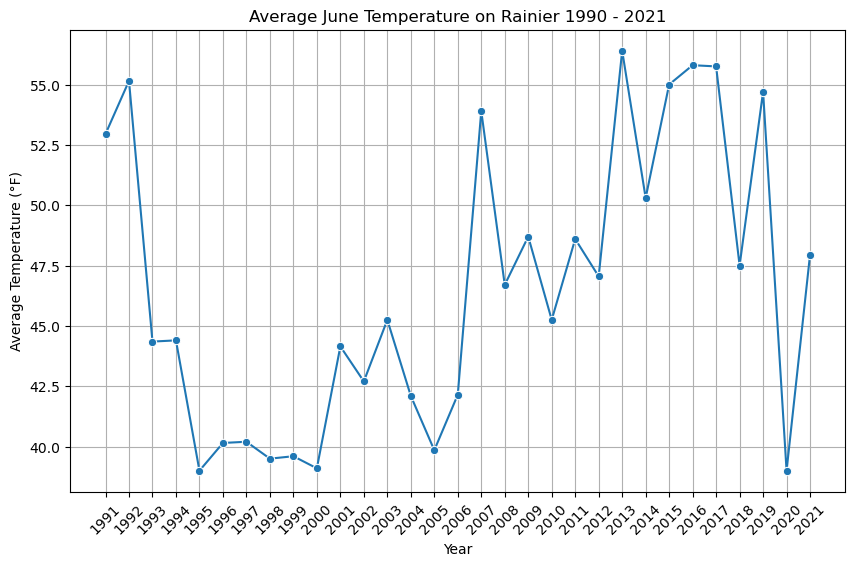

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

rainier_1990_2021 = noaa_rainier_june[11:42].copy()

plt.figure(figsize = (10, 6))
sns.lineplot(data = rainier_1990_2021, x = 'DATE', y = 'TAVG', marker = 'o')
plt.title('Average June Temperature on Rainier 1990 - 2021')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rainier_1990_2021['DATE'])
plt.tick_params(axis = 'x', rotation =45)
plt.grid()
plt.show()

Sooty Grouse (Watch - Decline), 2971

 Wilson's Warbler (Steep Decline)